In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pymc3 as pm
from sklearn.preprocessing import StandardScaler
%matplotlib inline

In [2]:
pd.set_option("display.max_columns", 999)
pd.set_option("display.max_colwidth", 999)

Must unzip data first before running this notebook

In [6]:
df = pd.read_csv("./data/globalterrorismdb_0617dist.csv", encoding="latin-1")

/Users/chrisjohnson/anaconda3/lib/python3.6/site-packages/IPython/core/interactiveshell.py:2698: DtypeWarning: Columns (4,6,31,33,53,61,62,63,76,79,90,92,94,96,114,115,121) have mixed types. Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


# Part One
- a good majority of my EDA was reading the [codebook](http://start.umd.edu/gtd/downloads/Codebook.pdf) that goes along with this data set. 

In [4]:
df.head()

,eventid,iyear,imonth,iday,approxdate,extended,resolution,country,country_txt,region,region_txt,provstate,city,latitude,longitude,specificity,vicinity,location,summary,crit1,crit2,crit3,doubtterr,alternative,alternative_txt,multiple,success,suicide,attacktype1,attacktype1_txt,attacktype2,attacktype2_txt,attacktype3,attacktype3_txt,targtype1,targtype1_txt,targsubtype1,targsubtype1_txt,corp1,target1,natlty1,natlty1_txt,targtype2,targtype2_txt,targsubtype2,targsubtype2_txt,corp2,target2,natlty2,natlty2_txt,targtype3,targtype3_txt,targsubtype3,targsubtype3_txt,corp3,target3,natlty3,natlty3_txt,gname,gsubname,gname2,gsubname2,gname3,gsubname3,motive,guncertain1,guncertain2,guncertain3,individual,nperps,nperpcap,claimed,claimmode,claimmode_txt,claim2,claimmode2,claimmode2_txt,claim3,claimmode3,claimmode3_txt,compclaim,weaptype1,weaptype1_txt,weapsubtype1,weapsubtype1_txt,weaptype2,weaptype2_txt,weapsubtype2,weapsubtype2_txt,weaptype3,weaptype3_txt,weapsubtype3,weapsubtype3_txt,weaptype4,weaptype4_txt,weapsubtype4,weapsubtype4_txt,weapdetail,nkill,nkillus,nkillter,nwound,nwoundus,nwoundte,property,propextent,propextent_txt,propvalue,propcomment,ishostkid,nhostkid,nhostkidus,nhours,ndays,divert,kidhijcountry,ransom,ransomamt,ransomamtus,ransompaid,ransompaidus,ransomnote,hostkidoutcome,hostkidoutcome_txt,nreleased,addnotes,scite1,scite2,scite3,dbsource,INT_LOG,INT_IDEO,INT_MISC,INT_ANY,related
0,197000000001,1970,7,2,NaN,0,NaN,58,Dominican Republic,2,Central America & Caribbean,NaN,Santo Domingo,18.456792,-69.951164,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,14,Private Citizens & Property,68.0,Named Civilian,NaN,Julio Guzman,58.0,Dominican Republic,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,MANO-D,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,0,0,0,NaN
1,197000000002,1970,0,0,NaN,0,NaN,130,Mexico,1,North America,NaN,Mexico city,19.432608,-99.133207,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,6,Hostage Taking (Kidnapping),NaN,NaN,NaN,NaN,7,Government (Diplomatic),45.0,"Diplomatic Personnel (outside of embassy, consulate)",Belgian Ambassador Daughter,"Nadine Chaval, daughter",21.0,Belgium,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,23rd of September Communist League,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,7.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,1.0,1.0,0.0,NaN,NaN,NaN,Mexico,1.0,800000.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,0,1,1,1,NaN
2,197001000001,1970,1,0,NaN,0,NaN,160,Philippines,5,Southeast Asia,Tarlac,Unknown,15.478598,120.599741,4.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,1,Assassination,NaN,NaN,NaN,NaN,10,Journalists & Media,54.0,Radio Journalist/Staff/Facility,Voice of America,Employee,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,13,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.0,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,PGIS,-9,-9,1,1,NaN
3,197001000002,1970,1,0,NaN,0,NaN,78,Greece,8,Western Europe,Attica,Athens,37.983773,23.728157,1.0,0,NaN,NaN,1,1,1,0,NaN,NaN,0,1,0,3,Bombing/Explosion,NaN,NaN,NaN,NaN,7,Government (Diplomatic),46.0,Embassy/Consulate,NaN,U.S. Embassy,217.0,United States,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Unknown,NaN,NaN,NaN,NaN,NaN,NaN,0.0,NaN,NaN,0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,6,Explosives/Bombs/Dynamite,16.0,Unknown Explosive Type,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Explosive,NaN,NaN,NaN,NaN,NaN,NaN,1,NaN,N

In [5]:
df.shape

(170350, 135)

In [6]:
print([col for col in df.columns])

['eventid', 'iyear', 'imonth', 'iday', 'approxdate', 'extended', 'resolution', 'country', 'country_txt', 'region', 'region_txt', 'provstate', 'city', 'latitude', 'longitude', 'specificity', 'vicinity', 'location', 'summary', 'crit1', 'crit2', 'crit3', 'doubtterr', 'alternative', 'alternative_txt', 'multiple', 'success', 'suicide', 'attacktype1', 'attacktype1_txt', 'attacktype2', 'attacktype2_txt', 'attacktype3', 'attacktype3_txt', 'targtype1', 'targtype1_txt', 'targsubtype1', 'targsubtype1_txt', 'corp1', 'target1', 'natlty1', 'natlty1_txt', 'targtype2', 'targtype2_txt', 'targsubtype2', 'targsubtype2_txt', 'corp2', 'target2', 'natlty2', 'natlty2_txt', 'targtype3', 'targtype3_txt', 'targsubtype3', 'targsubtype3_txt', 'corp3', 'target3', 'natlty3', 'natlty3_txt', 'gname', 'gsubname', 'gname2', 'gsubname2', 'gname3', 'gsubname3', 'motive', 'guncertain1', 'guncertain2', 'guncertain3', 'individual', 'nperps', 'nperpcap', 'claimed', 'claimmode', 'claimmode_txt', 'claim2', 'claimmode2', 'claim

In [9]:
df[["attacktype1_txt", "attacktype1"]].drop_duplicates()

,attacktype1_txt,attacktype1
0,Assassination,1
1,Hostage Taking (Kidnapping),6
3,Bombing/Explosion,3
4,Facility/Infrastructure Attack,7
5,Armed Assault,2
12,Hijacking,4
16,Unknown,9
298,Unarmed Assault,8
336,Hostage Taking (Barricade Incident),5


In [10]:
df["attacktype1_txt"].value_counts()

Bombing/Explosion                      83073
Armed Assault                          40223
Assassination                          18402
Hostage Taking (Kidnapping)            10233
Facility/Infrastructure Attack          9581
Unknown                                 6425
Unarmed Assault                          913
Hostage Taking (Barricade Incident)      902
Hijacking                                598
Name: attacktype1_txt, dtype: int64

In [11]:
df[["region", "region_txt"]].drop_duplicates()

,region,region_txt
0,2,Central America & Caribbean
1,1,North America
2,5,Southeast Asia
3,8,Western Europe
4,4,East Asia
6,3,South America
15,9,Eastern Europe
16,11,Sub-Saharan Africa
95,10,Middle East & North Africa
565,12,Australasia & Oceania


In [12]:
df["region_txt"].value_counts()

Middle East & North Africa     46511
South Asia                     41497
South America                  18762
Western Europe                 16307
Sub-Saharan Africa             15491
Southeast Asia                 11453
Central America & Caribbean    10340
Eastern Europe                  5031
North America                   3346
East Asia                        794
Central Asia                     554
Australasia & Oceania            264
Name: region_txt, dtype: int64

I used Tableau to create some graphs to help my EDA process. You can click on each image to go my Tableau Public account to interact with the graphs.

The graph shows the number of bombings per year with showing number by region inside of each bar. Part 3 is going to be predicting the number of bombings/explosions for the year 1993. Using this graph as a baseline I am going to be shooting for a number between 1500 and 1000.

[![Attack_types_by_year](./data/Attack_type_by_year.png)](https://public.tableau.com/profile/cbjohnson30#!/vizhome/WorldTerror-T_S/Sheet2)

This is a time series showing attacks around the world per year. When is this is in tableau desktop it is a really interesting way to show attacks around the world. This image is running through tableau public so it will be a little slower to load than I am use to. 

[![Attack_around_the_world](./data/Attack_around_the_world.png)](https://public.tableau.com/profile/cbjohnson30#!/vizhome/WorldTerror-T_S/Sheet1)

# Part 2
- I am going compare Western Europe and the United States to see if they have a significant difference in Armed Assault deaths. Armed Assaults include firearms, incendiaries, or sharp instruments.

In [13]:
#priors will be all kills by Armed Assaults in Western Europe and North America.  
d_west = df["nkill"][((df['region'] == 1) | (df['region']== 8))]
d_west = [k for k in d_west if k > 0]
d_west = [k for k in d_west if k < 100]
d_west
prior_mean = np.mean(d_west)
prior_std = np.std(d_west)

print(prior_mean, prior_std)

1.7937999060591827 4.299086064013622


All attacks in North America and Western Europe, minus the outliers, have a mean of 4.68 and standard deviation of 8.67.

In [14]:
# US fatalities in Armed Assaults
us_aa_o = df["nkill"][((df['country'] == 217) & (df['attacktype1']== 2))]
us_aa_o = [k for k in us_aa_o if k > 0]


In [15]:
# Western Europe fatalities in Armed Assults
we_aa_o = df["nkill"][((df['region_txt'] == "Western Europe") & (df['attacktype1']== 2))]
we_aa_o = [k for k in we_aa_o if k > 0]


In [16]:
print(np.mean(us_aa_o), np.mean(we_aa_o))

1.7627118644067796 1.8897795591182365


In [17]:
with pm.Model() as model:
    us_aa_mean = pm.Normal('US_Armed_Assault_Mean', prior_mean, sd=50)
    we_aa_mean = pm.Normal('WE_Armed_Assault_Mean', prior_mean, sd=50)
    
    us_aa_std = pm.HalfNormal('US_Armed_Assault_STD',sd=prior_std)
    we_aa_std = pm.HalfNormal('WE_Armed_Assault_STD',sd=prior_std)
    
    US_AA = pm.Normal('US_Armed_Assault', mu = us_aa_mean, sd = us_aa_std, observed =us_aa_o )
    US_BB = pm.Normal('WE_Armed_Assault', mu = we_aa_mean, sd = we_aa_std, observed = we_aa_o)
    
    mean_delta = pm.Deterministic('mean_delta', us_aa_mean - we_aa_mean)
    std_delta = pm.Deterministic('std_delta',us_aa_std - we_aa_std)
    effect_size = pm.Deterministic('effect_size', mean_delta / np.sqrt((us_aa_std**2 + us_aa_std**2)/2))

In [18]:
with model:
    trace = pm.sample(10000, njobs=2)

Auto-assigning NUTS sampler...
Initializing NUTS using jitter+adapt_diag...
/Users/chrisjohnson/anaconda3/lib/python3.6/site-packages/pymc3/model.py:384: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  if not np.issubdtype(var.dtype, float):
Multiprocess sampling (2 chains in 2 jobs)
NUTS: [WE_Armed_Assault_STD_log__, US_Armed_Assault_STD_log__, WE_Armed_Assault_Mean, US_Armed_Assault_Mean]
100%|██████████| 10500/10500 [00:08<00:00, 1238.91it/s]


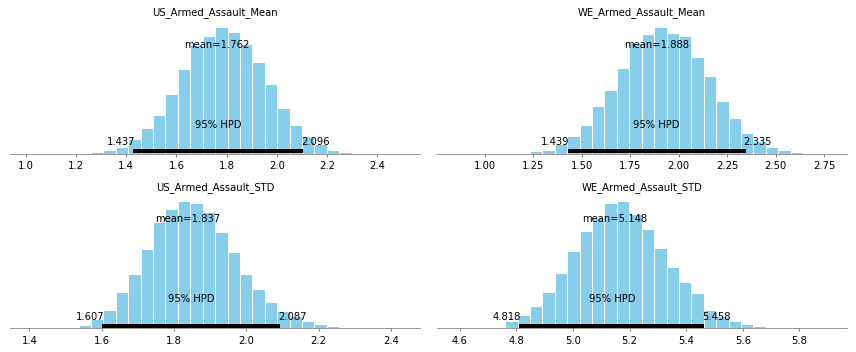

In [19]:
pm.plot_posterior(trace,
                  varnames=['US_Armed_Assault_Mean', 'WE_Armed_Assault_Mean',
                            'US_Armed_Assault_STD', 'WE_Armed_Assault_STD'],
                  color='#87ceeb');

Above are the means and standards deviation for the United States and Western Europe.
- means:
    - United States - between 1.437 and 2.096 at 95% confidence.
    - Western Europe - between 1.439 and 2.335 at 95% confidence.
- standard deviation
    - United States - between 1.607 and 2.87 at 95% confidence.
    - Western Europe - between 4.818 and 5.458 at 95% confidence.


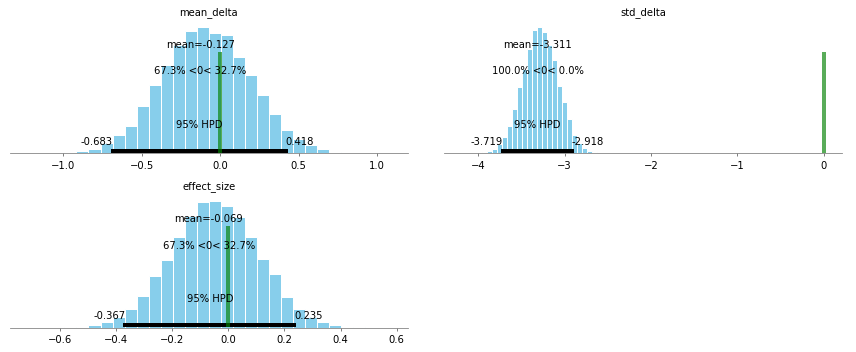

In [20]:
pm.plot_posterior(trace,
                  varnames=['mean_delta','std_delta','effect_size'],
                  color='#87ceeb', ref_val=0);

What I find interesting from these graphs above is how far the standard deviation for U.S armed assaults is away from from Western Europe's. It is roughly 3 lower than Western Europe's even though the means are relatively similar. This means that Western Europe is going to have a wider range of killings in there armed assaults. 

# Part 3
- Try to predict the number of bombings that occurred in 1993

To find the number of bombings in 1993 I wanted to focus region by region to help my predictions be more focused. Then I subsetted the data to only include 10 year +- 1993. When running the model on years 1970 to 2016 I did not like the graphs and estimate that it produced. This also allowed my predictions to be more effected on a set of time that is similar to 1993. After getting a prediction for each regions I was able to add them together to be able to get a estimate for number of bombings in 1993. 


In [3]:
def find_1993(df):
    bombs = []
    regions = df["region_txt"].unique()
    for r in regions:
        region = df[df["region_txt"] == r]
        region = pd.crosstab(index=region["iyear"], columns=[region["attacktype1_txt"]],margins=True)
        region.reset_index(inplace=True)
        region.drop(region.tail(1).index, inplace=True)
        region["iyear"] = region["iyear"].map(lambda x: int(x))
        region = region[(region["iyear"] >= 1983) & (region["iyear"] <= 2003)]
        year_BE = region[["iyear", "Bombing/Explosion"]]
        
        with pm.Model() as reg:
            std = pm.HalfNormal("std", sd=10) # std tf the residuals
            intercept = pm.Normal("intercept", mu=0, sd=10) #beta_0
            beta = pm.Normal("beta", mu=0, sd=10) #beta_1
            E_BE = pm.Normal("E_BE", mu=intercept + (beta * year_BE["iyear"].values), sd=std, observed=year_BE["Bombing/Explosion"].values)
            
        with reg:
            map_estimate = pm.find_MAP()
            
        fig, ax = plt.subplots(figsize=(5,5))
        ax.scatter(year_BE["iyear"].values, year_BE["Bombing/Explosion"].values, alpha=0.2)
        ax.plot(year_BE["iyear"].values, map_estimate['intercept'] + year_BE["iyear"].values*map_estimate['beta'])
        plt.title("region %r" %r)
        plt.show()
        
        y = map_estimate['intercept'] + year_BE["iyear"].values*map_estimate['beta']
        pred_df = pd.DataFrame()
        pred_df["iyear"] = year_BE["iyear"]
        pred_df["pred"] = y
        pred_1992 = pred_df[(pred_df["iyear"] == 1992) | (pred_df["iyear"] == 1994)]
        bombs_1992_r = pred_1992["pred"].mean()
        bombs.append(bombs_1992_r)
    return bombs

logp = -156.25, ||grad|| = 0.013474: 100%|██████████| 23/23 [00:00<00:00, 1579.00it/s]  


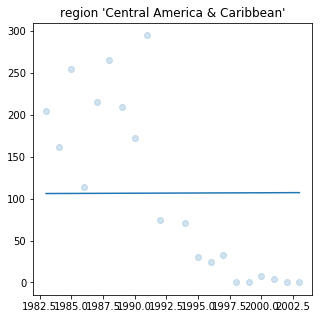

logp = -78.874, ||grad|| = 63.715: 100%|██████████| 20/20 [00:00<00:00, 1921.83it/s]  


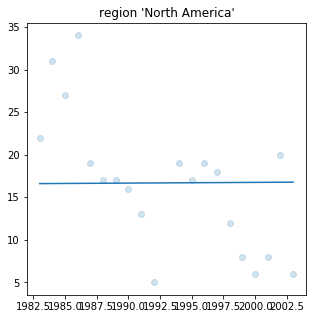

logp = -118, ||grad|| = 47.879: 100%|██████████| 25/25 [00:00<00:00, 1833.91it/s]    


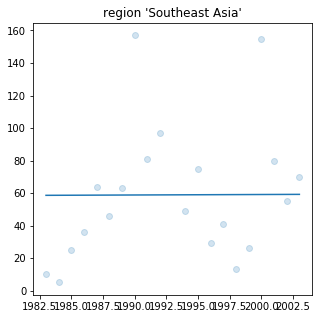

logp = -149.45, ||grad|| = 28.427: 100%|██████████| 25/25 [00:00<00:00, 1916.75it/s]   


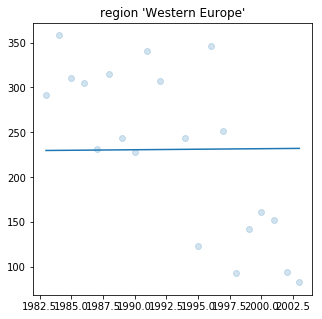

logp = -92.213, ||grad|| = 1,256.7: 100%|██████████| 20/20 [00:00<00:00, 2104.15it/s]  


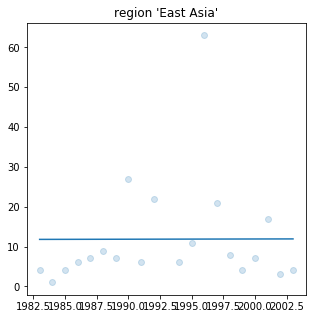

logp = -243.98, ||grad|| = 0.0016193: 100%|██████████| 22/22 [00:00<00:00, 1708.32it/s]  


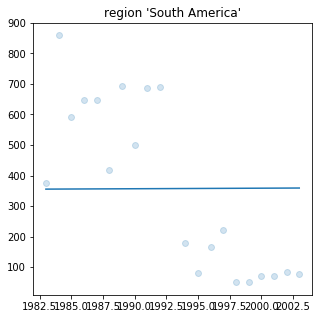

logp = -120.84, ||grad|| = 0.0018908: 100%|██████████| 22/22 [00:00<00:00, 1636.28it/s]  


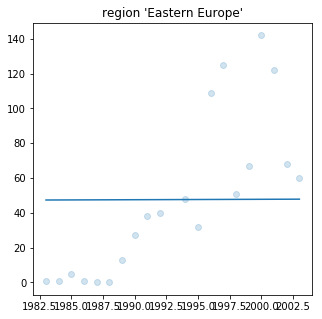

logp = -136.23, ||grad|| = 4.7575: 100%|██████████| 24/24 [00:00<00:00, 1912.01it/s]   


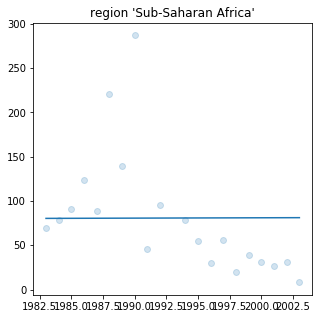

logp = -128.06, ||grad|| = 55.168: 100%|██████████| 25/25 [00:00<00:00, 1885.22it/s]   


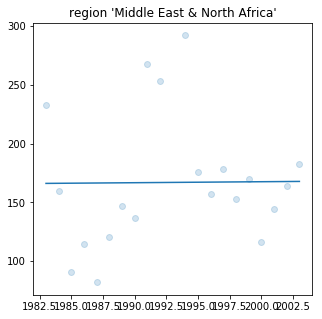

logp = -51.917, ||grad|| = 1.257: 100%|██████████| 24/24 [00:00<00:00, 1807.92it/s]    


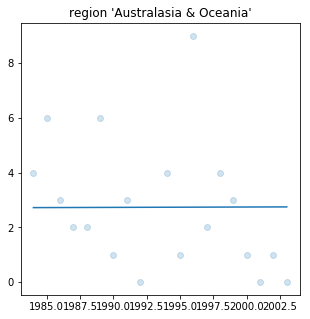

logp = -129.81, ||grad|| = 53.134: 100%|██████████| 26/26 [00:00<00:00, 1944.65it/s]   


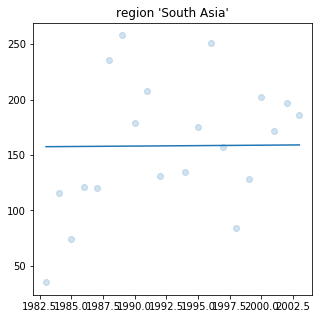

logp = -51.326, ||grad|| = 27.758: 100%|██████████| 19/19 [00:00<00:00, 1843.95it/s]  


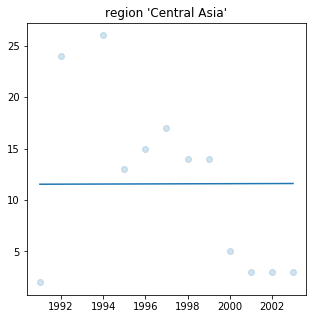

In [122]:
bombs = find_1993(df)

In [123]:
bombs

[106.68426887742743,
 16.683116222795093,
 58.884493967318335,
 231.034842474458,
 11.856507985199347,
 357.3385107995611,
 47.61148100256686,
 80.7336324547592,
 167.01575273847416,
 2.733657516085996,
 158.31436165122378,
 11.550040039507738]

My Prediction for the number of bombings that happened in 1993 is 1250. 

In [124]:
sum(bombs)

1250.4406657293773

### P.S
 - If anyone knows why my lines of best fit are all basically flat I would love to know why. I came up with a number that I think works given my graph above. (I was shooting for 1500 to 1000) I am just not sure why all of the line are flat. I tried to to standardize the years by setting 1983 to be 0 and the line ended up being positive when the trend was negative. Please feel free to push me some code or reach out to me in any other way if you have an answer. Thank you. 